In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import datetime

import gym
import trading_env

import os
import agent 
from os import __file__

In [2]:
#env = gym.make('trading-v0')
env_trading = gym.make('test_trading-v0')

Loading historical data file


Holder Agent
--------------
To begin a holder agent will run on the month of march 2017, which will provide a reference to compare future agents. The same could also be done with a random agent. A holder agent is equivalent to set the action to 1 at each step (selling 100% of the portfolio's fiat).

In [3]:
date = datetime.datetime(2017, 5, 1, 0, 0)
env_trading.reset(date=date)
rewards = []
portfolio = []
while True:
    action = np.array([1]) #Holding
    s, r, done, _ = env_trading.step(action)
    rewards.append(r)
    portfolio.append(env_trading.portfolio_value)
    if done:
        break

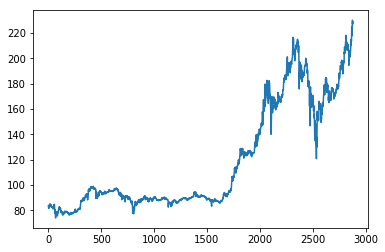

In [4]:
plt.plot(portfolio)
plt.show()

Stochastic Policy Gradient
-----------

In [5]:
agent = agent.StochasticPolicyGradientAgent(env_trading) #Do not run this twice without reseting the Kernel!

ValueError: None values not supported.

In [6]:
#As a sanity check I try to overfit over the same step
#A profitable action in this case would be to buy (action=1)

date = datetime.datetime(2017, 5, 1, 0, 0)
rewards = []
losses = []
env_trading.start_fiat = 100
env_trading.start_crypto = 1

for i in range(100):
    start = env_trading.reset(date=date)
    start = np.reshape(start,200)
    action = agent.act([start])
    s, r, done, _ = env_trading.step([action])
    s = np.reshape(s,200)
    agent.store_step(action, s, r)
    rewards.append(r)
    agent.train()


Sigma: 0.9927880764007568, Mu: 0.0997961238026619, Action: -0.7453908920288086
Sigma: 0.8786351680755615, Mu: -0.315367192029953, Action: 0.3874458968639374
Sigma: 0.9388937950134277, Mu: -0.02555842325091362, Action: -1.0
Sigma: 0.9849746227264404, Mu: 0.4854031801223755, Action: 0.7801811099052429
Sigma: 1.0552847385406494, Mu: 0.5878623127937317, Action: -1.0
Sigma: 1.1105363368988037, Mu: 0.7992609739303589, Action: -1.0
Sigma: 1.1589300632476807, Mu: 0.940344512462616, Action: 0.5855199098587036
Sigma: 1.131288766860962, Mu: 0.9578220844268799, Action: 0.9010412693023682
Sigma: 1.080779790878296, Mu: 0.9963122606277466, Action: 1.0
Sigma: 1.0116254091262817, Mu: 0.9965667128562927, Action: 0.8182145953178406
Sigma: 0.935096800327301, Mu: 0.9967809915542603, Action: 0.2357960343360901
Sigma: 0.8445451259613037, Mu: 0.9970828294754028, Action: 1.0
Sigma: 0.7670779824256897, Mu: 0.9972974061965942, Action: 1.0
Sigma: 0.6994632482528687, Mu: 0.9983184337615967, Action: 0.4510397911071

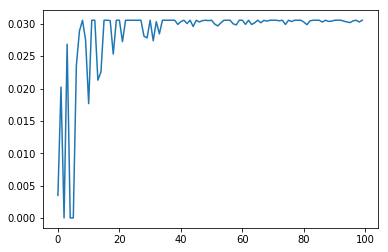

In [7]:
plt.plot(rewards)
plt.show()

# Starting the real training

In [ ]:
#To debug
NUM_EP = 1000
date = datetime.datetime(2017, 5, 1, 0, 0)
for i in range(NUM_EP):
    state = env_trading.reset(date=date)
    total_reward = 0
    rewards_plot = []
    while(True):
        action = agent.act([state])
        state, reward, done, _ = env_trading.step([action])
        agent.store_step([action], state, reward)
        total_reward += reward
        if done:
            rewards_plot.append(total_reward)
            print("Episode: {}, Total reward: {}".format(i,total_reward))
            break
    agent.train()

plt.plot(rewards_plot)
plt.show()